# Data cleaning for question 3:  What are the Top Studios in Terms of Total Gross Revenue?

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

## Import dataframe from csv file using pd.read_csv function and review dataframe

In [2]:
bom_df = pd.read_csv('/Users/Gabby/Flatiron/project_1/dsc-phase-1-project-online/zippedData/bom.movie_gross.csv')

In [3]:
#reviewing bom_df
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000,664300000,2010
3,Inception,WB,292600000.000,535700000,2010
4,Shrek Forever After,P/DW,238700000.000,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.000,398000000,2010
6,Iron Man 2,Par.,312400000.000,311500000,2010
7,Tangled,BV,200800000.000,391000000,2010
8,Despicable Me,Uni.,251500000.000,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.000,277300000,2010


In [4]:
#checking for duplicates
duplicates = bom_df[bom_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


**No duplicate rows.**

In [5]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**bom_df.info() shows that there are some missing values in 'studio', 'domestic_gross', and 'foreign_gross columns'**

## Dealing with missing values in 'domestic_gross' and 'foreign_gross' columns using median

*The best way of dealing with missing values in 'domestic_gross' and 'foreign_gross' columns is to replace them with the median of the column since the median is lest likely to influence the distribution of the data.*

In [6]:
#replacing Nan values in 'domestic_gross' column with its median
dom_median = bom_df['domestic_gross'].median()
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(dom_median)

#replacing Nan values in 'foreign_gross' column with its median
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(",","").astype(float)

for_median = bom_df['foreign_gross'].median()
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(for_median)

## Dealing with missing values in the 'studio' column using mode


*The best way of dealing with missing values in the studio column is to replace them with the mode of the column since it is categorical data.*

In [7]:
studio_mode = bom_df['studio'].mode()[0]
bom_df['studio'].fillna(studio_mode, inplace = True)

In [8]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [9]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000,652000000.000,2010
1,Alice in Wonderland (2010),BV,334200000.000,691300000.000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000,664300000.000,2010
3,Inception,WB,292600000.000,535700000.000,2010
4,Shrek Forever After,P/DW,238700000.000,513900000.000,2010


**bom_df.info and bom_df.head() show that the 'foreign_gross' column has been converted from an object to a float.**

## Check for extraneous values in columns of bom_df

*Extraneous values in columns can be the result of placeholder values. We want to make sure we do not have any so our data is as accurate as possible.*

In [10]:
#check extraneous values
for col in bom_df.columns:
    print(col, '\n', bom_df[col].value_counts().head(), '\n\n')

title 
 Bluebeard                   2
Neither Heaven Nor Earth    1
That Awkward Moment         1
Unbroken                    1
A Long Way Down             1
Name: title, dtype: int64 


studio 
 IFC      171
Uni.     147
WB       140
Fox      136
Magn.    136
Name: studio, dtype: int64 


domestic_gross 
 1400000.000    51
1100000.000    32
1000000.000    30
1300000.000    30
1200000.000    25
Name: domestic_gross, dtype: int64 


foreign_gross 
 18700000.000    1352
1200000.000       23
1100000.000       14
1900000.000       12
4200000.000       12
Name: foreign_gross, dtype: int64 


year 
 2015    450
2016    436
2012    400
2011    399
2014    395
Name: year, dtype: int64 




In [11]:
#check to make sure there are no longer any Nan values
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [12]:
bom_df['studio'].nunique()

257

## Calcuate 'total_revenue' by adding 'domestic_gross' and	'foreign_gross' column values together per movie 'title

In [13]:
bom_df['total_revenue'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [14]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
 5   total_revenue   3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


## Group the dataframe by studio and sort values by total_revenue

In [16]:
grouped_df = bom_df.groupby(['studio']).sum().reset_index()


grouped_df = grouped_df.sort_values('total_revenue', axis = 0, ascending = False).reset_index()


In [17]:
#checking for nan values again
grouped_df.isna().sum()

index             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_revenue     0
dtype: int64

## Using Seaborn, plot a bar graph of the data

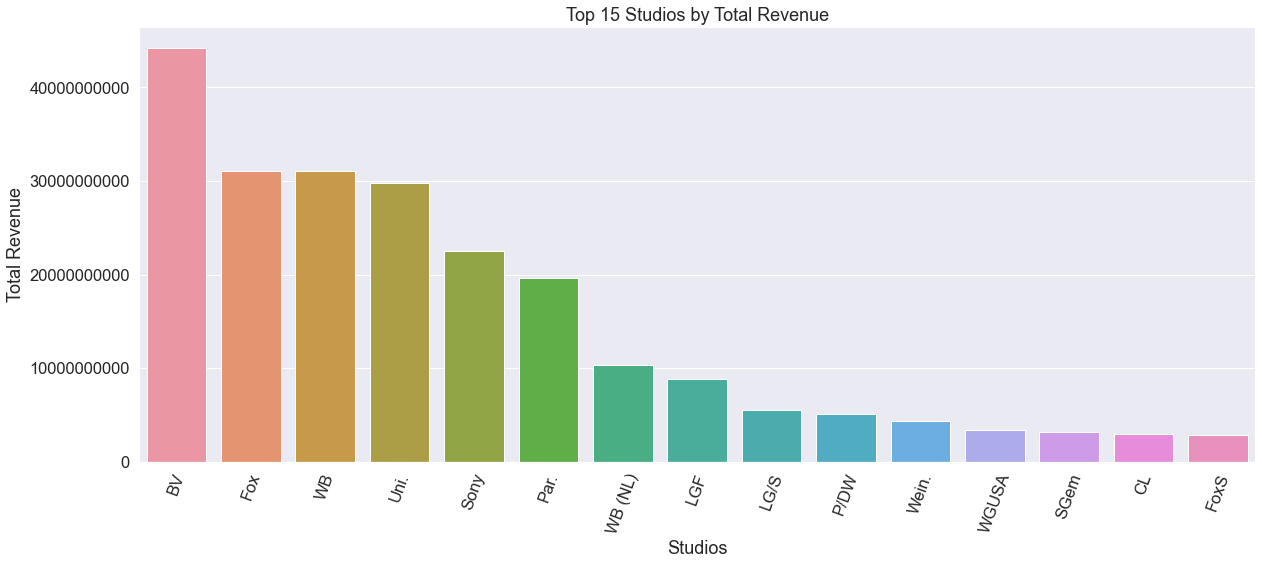

In [22]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale =1.5)
sns.set_style('darkgrid')
palette = sns.set_palette('dark')
ax = sns.barplot(x= grouped_df.head(15)['studio'], y=grouped_df.head(15)['total_revenue'])
ax.set(xlabel='Studios', ylabel='Total Revenue')
plt.ticklabel_format(style='plain', axis= 'y')
plt.xticks(rotation=70)
plt.title('Top 15 Studios by Total Revenue')
plt.show()